# Introduction
In the following you will see how to read the provided files for the mini-project 3.
First you will see how to read each of the provided files. Then, you will see a more elegant way of using this data for training neural networks.

In [9]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
import torch

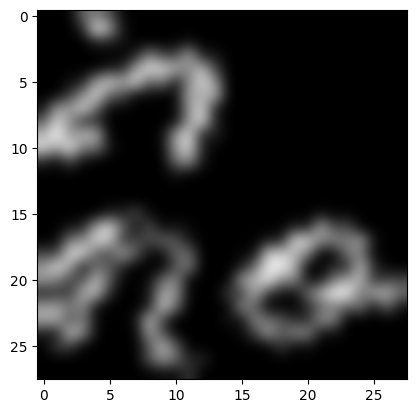

In [10]:
# Read a pickle file and disply its samples

data = pickle.load( open( 'Train.pkl', 'rb' ))
targets = np.genfromtxt('Train_labels.csv', delimiter=',')
# data = np.squeeze(data,axis=1)
plt.imshow(data[1234][0], cmap='gray', interpolation="bicubic")
plt.show()



# Loading data

In [21]:
# Read image data and their label into a Dataset 
data = pickle.load( open( 'Train.pkl', 'rb' ))
targets = np.genfromtxt('Train_labels.csv', delimiter=',')

data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

# Remove first row and column from targets
targets = targets[1:]
targets = targets[:,1]

dataset = TensorDataset(data,targets)

tensor(8., dtype=torch.float64)


In [29]:
batch_size = 13 #feel free to change it
dataloader = DataLoader(dataset,batch_size=batch_size, shuffle=True)

In [32]:
# Read a batch of data and their labels and display them
[imgs, labels] = (next(iter(dataloader)))
imgs = np.squeeze(imgs)
plt.imshow(imgs[12].cpu().numpy(),cmap='gray',interpolation="bicubic") #.transpose()
print(labels[12])

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [ ]:
# Here is a piece of code that reads data in batch.
# In each epoch all samples are read in batches using dataloader

num_epochs=2 # Feel free to change it
for epoch in range(num_epochs):
    for data in dataloader:
        [img,label] = data

